In [ ]:
#importing library to print multiple lines in one code shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#importing library to mount my google drive because dataset is uploaded in my google drive
from google.colab import drive
drive.mount('/content/drive/')

#importing library to deal with matrices
import numpy as np

#importing library to deal with csv file dataset
import pandas as pd

#importing library to do some math operations
import math
import random

#importing library used for plotting purpose
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Importing The Dataset**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/42/SSD sir/solar_irradiance_prediction_dataset.csv')
dataset = dataset.sort_values(['UNIXTime'], ascending = [True])
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7416,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


# **Feature Engineering**


### **Creating new variables**

In [ ]:
# changing the index of the dataset
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
UNIXTime,,,,,,,,,,,
2016-09-01 10:00:08,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
2016-09-01 10:05:10,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
2016-09-01 10:20:06,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
2016-09-01 10:25:05,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
2016-09-01 10:30:09,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [ ]:
# converting index time to hawaii time
from datetime import datetime
from pytz import timezone
import pytz

hawaii= timezone('Pacific/Honolulu')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(hawaii)
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
UNIXTime,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
2016-09-01 00:25:05-10:00,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
2016-09-01 00:30:09-10:00,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [ ]:
# adding some new columns to the dataset
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['TimeOfDay(h)'] = dataset.index.hour
dataset['TimeOfDay(m)'] = dataset.index.hour*60 + dataset.index.minute
dataset['TimeOfDay(s)'] = dataset.index.hour*60*60 + dataset.index.minute*60 + dataset.index.second
dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S')
dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S')
dataset['DayLength(s)'] = dataset['TimeSunSet'].dt.hour*60*60 \
                           + dataset['TimeSunSet'].dt.minute*60 \
                           + dataset['TimeSunSet'].dt.second \
                           - dataset['TimeSunRise'].dt.hour*60*60 \
                           - dataset['TimeSunRise'].dt.minute*60 \
                           - dataset['TimeSunRise'].dt.second
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,1900-01-01 06:07:00,1900-01-01 18:38:00,9,245,35,0,0,8,45060
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,1900-01-01 06:07:00,1900-01-01 18:38:00,9,245,35,0,5,310,45060
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,1900-01-01 06:07:00,1900-01-01 18:38:00,9,245,35,0,20,1206,45060
2016-09-01 00:25:05-10:00,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,1900-01-01 06:07:00,1900-01-01 18:38:00,9,245,35,0,25,1505,45060
2016-09-01 00:30:09-10:00,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,1900-01-01 06:07:00,1900-01-01 18:38:00,9,245,35,0,30,1809,45060


In [ ]:
# removing some columns from the dataset
dataset.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
dataset.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,77.27,11.25,9,245,35,0,0,8,45060
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,153.44,9.00,9,245,35,0,5,310,45060
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,142.04,7.87,9,245,35,0,20,1206,45060
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,144.12,18.00,9,245,35,0,25,1505,45060
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,67.42,11.25,9,245,35,0,30,1809,45060


### **Pearson Correlation**


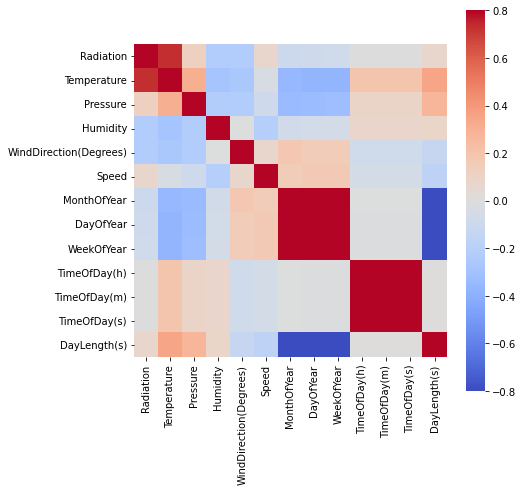

In [ ]:
corrmat = dataset.drop(['UNIXTime'], inplace=False, axis=1)
corrmat = corrmat.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'coolwarm')
plt.show()

From the above plots, its clear that 
1. Temperature has strong corellation with solar irradiance
2. Solar irradiance does not have a linear correlation with time of day
3. It also suggests that the day of year will have a significantly weaker influence on solar irradiance compared to temperature.


# **Splitting Dataset**

In [ ]:
### **Separating the Independent and Dependent Variables**
X = dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'TimeOfDay(s)']]
y = dataset['Radiation']

In [ ]:
### Train Test (80:20) Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Feature Selection**


Although linear regressors can be used to estimate the importance of different features, it was felt that in this situation, with relatively nonlinear data, that this method would not be suitable. Fortunately, sci-kit learn's decision tree based regressors contain a feature importance attribute. This attribute was used to perform a backwards elimination procedure, where the least important feature of the regressor was repeatedly removed and the r<sup>2</sup> scores, from cross validation, of each model were recorded.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators = 100)
rf_regressor.fit(X_train, y_train)
feature_importances = rf_regressor.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,5):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
    rf_regressor.fit(X_train_opt, y_train)
    feature_importances = rf_regressor.feature_importances_
    accuracies = cross_val_score(estimator = rf_regressor,
                                 X = X_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

In [ ]:
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection

,Features,r2 Score
0,"Temperature, Pressure, Humidity, WindDirection...",0.932517
1,"Temperature, Humidity, WindDirection(Degrees),...",0.931051
2,"Temperature, Humidity, DayOfYear, TimeOfDay(s)",0.933751
3,"Temperature, DayOfYear, TimeOfDay(s)",0.932486
4,"Temperature, TimeOfDay(s)",0.800197


From the dataframe output, it can be seen that model performance stays relatively constant until 'DayOfYear' is removed, leaving 'Temperature' and 'TimeOfDay(s)' as the only features. Without performing any parameter tuning it appears that the random forest regressor, fit to 'Temperature', 'TimeOfDay(s)' and 'DayOfYear' is able to acheive a r<sup>2</sup> score as high as 0.93.

In [ ]:
X_train_best = X_train[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]
X_test_best = X_test[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]

# **Data Modelling**

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf_regressor = RandomForestRegressor(n_estimators = 100)
rf_regressor.fit(X_train_best, y_train)

RandomForestRegressor()

In [ ]:
### Cross validation, with a greater number of folds, again shows an r2 score of 0.93.
accuracies = cross_val_score(estimator = rf_regressor, X = X_train_best,y = y_train, cv = 10, scoring = 'r2')
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

r2 = 0.9342092710375708


In [ ]:
### inference / predicting the test set
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
y_pred = rf_regressor.predict(X_test_best)
explained_variance_score = explained_variance_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.9394906021556917
mse = 6243.551843760034
r2 = 0.9394300459206635


### **Conclusion**
The variables most relevant to the prediction of solar irradiance were found to be temperature, time of day, and day of year. Training a random forest regressor with these three variables (with units of farenheit, seconds, and days respectively) produced a model that acheived a mean r<sup>2</sup> score of 0.93 when cross validation was performed. When comparing predictions to a test set, again, an r<sup>2</sup> score of approximately 0.93 was obtained.The performance acheived when estimating the test set is very close to that found from cross validation, implying that the model is not overfit.

## **LSTM**

In [ ]:
### creating features
feature_window_size = 14
prediction_window_size = 1

In [ ]:
### for training dataset
X_train = []
y_train_new = []
for i in range(feature_window_size, len(X_train_best)):
    X_train.append(X_train_best[i-feature_window_size:i])
    y_train_new.append(y_train[i-1:i])
X_train, y_train_new = np.array(X_train), np.array(y_train_new)

In [ ]:
### for testing dataset
X_test = []
y_test_new = []

for i in range(feature_window_size, len(X_test_best)):
    X_test.append(X_test_best[i-feature_window_size:i])
    y_test_new.append(y_test[i-1:i])
X_test, y_test_new = np.array(X_test), np.array(y_test_new)

In [ ]:
### Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

lstm_regressor = Sequential()

In [ ]:
# creating a 4 stacked LSTM RNN Model

# Adding the first LSTM layer and some Dropout regularisation
lstm_regressor.add(LSTM(units = 50,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2]))) # return_sequences = True tells the library to return hidden states 
lstm_regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
lstm_regressor.add(LSTM(units = 50,activation='tanh', return_sequences = True))
lstm_regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
#lstm_regressor.add(LSTM(units = 50,activation='tanh', return_sequences = True))
#lstm_regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
#lstm_regressor.add(LSTM(units = 50,activation='relu', return_sequences = False))
#lstm_regressor.add(Dropout(0.2))

# Adding the output layer i.e. the optional V matrix wala layer because it is requried here
lstm_regressor.add(Dense(units = y_train_new.shape[1]))

# remeber that here we are not putting the optional softmax layer

In [ ]:
lstm_regressor.trainable_weights # there are many such regressor._________ fucntions - explore

[<tf.Variable 'lstm_5/lstm_cell_5/kernel:0' shape=(3, 200) dtype=float32, numpy=
 array([[-1.66981995e-01, -1.70016006e-01,  7.72565603e-03,
         -1.29269585e-01, -8.40439200e-02, -7.35366270e-02,
          1.47014141e-01, -4.61294353e-02, -9.03106928e-02,
         -1.91669166e-03,  9.03892219e-02, -1.17153957e-01,
          2.99771726e-02, -8.45865309e-02,  1.19994909e-01,
          2.91024595e-02,  1.23009026e-01, -6.41728863e-02,
          8.70468616e-02, -1.06647693e-01, -1.47835910e-02,
         -3.99370044e-02,  3.92089635e-02,  9.87067521e-02,
          5.87138087e-02,  1.44328594e-01, -5.12364581e-02,
         -1.70528695e-01, -4.06223536e-02,  4.39325422e-02,
         -1.99016184e-02,  5.06996661e-02,  1.03000730e-01,
         -9.43939760e-02, -5.81096262e-02,  4.11637127e-03,
          4.64456975e-02,  3.90696079e-02, -5.69765642e-02,
         -1.16225481e-01, -1.19240589e-01, -4.48199511e-02,
         -4.74371836e-02,  9.34668481e-02, -7.68435821e-02,
          8.5524290

In [ ]:
### Compiling the RNN
lstm_regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # use cross_entropy_error instead

In [ ]:
### Fitting the LSTM RNN to the Training set
lstm_regressor.fit(X_train, y_train_new, epochs = 100, batch_size = 32)

Epoch 1/100
817/817 [==============================] - 35s 34ms/step - loss: 102115.5859
Epoch 2/100
817/817 [==============================] - 28s 34ms/step - loss: 100417.0938
Epoch 3/100
817/817 [==============================] - 28s 34ms/step - loss: 100692.1172
Epoch 4/100
817/817 [==============================] - 29s 35ms/step - loss: 100490.0859
Epoch 5/100
817/817 [==============================] - 28s 34ms/step - loss: 100119.0703
Epoch 6/100
817/817 [==============================] - 27s 34ms/step - loss: 99922.0000
Epoch 7/100
817/817 [==============================] - 28s 34ms/step - loss: 99818.0703
Epoch 8/100
817/817 [==============================] - 28s 34ms/step - loss: 100196.9062
Epoch 9/100
817/817 [==============================] - 28s 34ms/step - loss: 100185.5156
Epoch 10/100
817/817 [==============================] - 28s 34ms/step - loss: 100125.9141
Epoch 11/100
817/817 [==============================] - 28s 34ms/step - loss: 99818.8125
Epoch 12/100
817/817 [

In [ ]:
y_train_predicted = lstm_regressor.predict(X_train)
y_test_predicted = lstm_regressor.predict(X_test)

In [ ]:
y_train_predicted

array([[188.5853 ],
       [187.1229 ],
       [186.34314],
       ...,
       [183.11346],
       [184.70966],
       [187.5961 ]], dtype=float32)

In [ ]:
y_train_new

array([[  1.25],
       [  1.23],
       [667.32],
       ...,
       [  1.2 ],
       [488.24],
       [  1.24]])

In [ ]:
y_test_predicted

array([[185.66641],
       [187.20688],
       [187.2351 ],
       ...,
       [188.19202],
       [187.16177],
       [187.71286]], dtype=float32)

In [ ]:
y_test_new

array([[ 83.95],
       [309.7 ],
       [ 24.65],
       ...,
       [883.45],
       [527.35],
       [  1.2 ]])

In [ ]:
explained_variance_score = explained_variance_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))